In [44]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# PostgreSQL credentials
username = 'postgres'
password = quote_plus('Gagan@2315')
host = 'localhost'
port = '5432'
database = 'postgres'  # creating new DB

# Connect
engine = create_engine(
    f'postgresql://{username}:{password}@{host}:{port}/{database}?sslmode=disable'
)

# Test connection
version = pd.read_sql("SELECT version();", engine)
print(version)

                                             version
0  PostgreSQL 18.0 on x86_64-windows, compiled by...


In [47]:
import psycopg2

# PostgreSQL credentials
username = 'postgres'
password = 'Gagan@2315'
host = 'localhost'
port = '5432'
db_name = "retail_analytics_db"

# Connect to default 'postgres' database
conn = psycopg2.connect(
    dbname='postgres',
    user=username,
    password=password,
    host=host,
    port=port
)

conn.autocommit = True  # allow CREATE DATABASE outside transaction
cur = conn.cursor()

# Create the new database
try:
    cur.execute(f"CREATE DATABASE {db_name};")
    print(f"Database '{db_name}' created successfully!")
except psycopg2.errors.DuplicateDatabase:
    print(f"Database '{db_name}' already exists.")
finally:
    cur.close()
    conn.close()

Database 'retail_analytics_db' already exists.


In [48]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = 'postgres'
password = quote_plus('Gagan@2315')
host = 'localhost'
port = '5432'
database = 'retail_analytics_db'

engine = create_engine(
    f'postgresql://{username}:{password}@{host}:{port}/{database}?sslmode=disable'
)

# Test connection
version = pd.read_sql("SELECT version();", engine)
print(version)

                                             version
0  PostgreSQL 18.0 on x86_64-windows, compiled by...


In [49]:
from sqlalchemy import text

create_tables = """
-- Customers
CREATE TABLE IF NOT EXISTS customers (
    customer_id SERIAL PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    city VARCHAR(50),
    signup_date DATE,
    email VARCHAR(100)
);

-- Products
CREATE TABLE IF NOT EXISTS products (
    product_id SERIAL PRIMARY KEY,
    product_name VARCHAR(100),
    category VARCHAR(50),
    brand VARCHAR(50),
    price NUMERIC(10,2)
);

-- Stores
CREATE TABLE IF NOT EXISTS stores (
    store_id SERIAL PRIMARY KEY,
    store_name VARCHAR(100),
    city VARCHAR(50),
    region VARCHAR(50)
);

-- Orders
CREATE TABLE IF NOT EXISTS orders (
    order_id SERIAL PRIMARY KEY,
    customer_id INT REFERENCES customers(customer_id),
    order_date DATE,
    store_id INT REFERENCES stores(store_id)
);

-- Order items
CREATE TABLE IF NOT EXISTS order_items (
    order_item_id SERIAL PRIMARY KEY,
    order_id INT REFERENCES orders(order_id),
    product_id INT REFERENCES products(product_id),
    quantity INT,
    discount_pct NUMERIC(5,2) DEFAULT 0
);

-- Returns
CREATE TABLE IF NOT EXISTS returns (
    return_id SERIAL PRIMARY KEY,
    order_item_id INT REFERENCES order_items(order_item_id),
    return_date DATE,
    return_reason VARCHAR(255)
);
"""

with engine.begin() as conn:
    conn.execute(text(create_tables))

print("Tables created successfully!")

Tables created successfully!


In [50]:
from sqlalchemy import text

insert_data = """
-- Customers
INSERT INTO customers (first_name,last_name,city,signup_date,email) VALUES
('Aisha','Khan','London','2024-01-15','aisha.k@example.com'),
('Ravi','Singh','Leeds','2023-11-07','ravi.s@example.com'),
('Maya','Patel','Bristol','2022-06-20','maya.p@example.com'),
('Sam','Taylor','Manchester','2024-03-02','sam.t@example.com'),
('Zara','Ali','Birmingham','2021-12-30','zara.a@example.com');

-- Products
INSERT INTO products (product_name,category,brand,price) VALUES
('Wireless Headphones','Electronics','BeatSound',79.99),
('Running Shoes','Footwear','SprintCo',59.50),
('Coffee Maker','Home Appliances','BrewIt',45.00),
('Denim Jeans','Apparel','DenimLab',39.99);

-- Stores
INSERT INTO stores (store_name,city,region) VALUES
('Central Mall London','London','South East'),
('Leeds Station Store','Leeds','Yorkshire'),
('Bristol Outlet','Bristol','South West');

-- Orders
INSERT INTO orders (customer_id,order_date,store_id) VALUES
(1,'2024-08-01',1),
(2,'2024-07-15',2),
(3,'2024-06-22',3);

-- Order items
INSERT INTO order_items (order_id,product_id,quantity,discount_pct) VALUES
(1,1,1,0),
(1,3,2,5),
(2,2,1,0),
(3,1,1,10);

-- Returns
INSERT INTO returns (order_item_id,return_date,return_reason) VALUES
(3,'2024-07-18','Damaged item');
"""

with engine.begin() as conn:
    conn.execute(text(insert_data))

print("Sample data inserted successfully!")

Sample data inserted successfully!


In [51]:
from sqlalchemy import text

tables = ["customers", "products", "stores", "orders", "order_items", "returns"]

with engine.connect() as conn:
    for t in tables:
        print(f"\n=== {t.upper()} ===")
        df = pd.read_sql(text(f"SELECT * FROM {t}"), conn)
        display(df)


=== CUSTOMERS ===


customer_id first_name last_name        city signup_date  \
0            1      Aisha      Khan      London  2024-01-15   
1            2       Ravi     Singh       Leeds  2023-11-07   
2            3       Maya     Patel     Bristol  2022-06-20   
3            4        Sam    Taylor  Manchester  2024-03-02   
4            5       Zara       Ali  Birmingham  2021-12-30   
5            6      Aisha      Khan      London  2024-01-15   
6            7       Ravi     Singh       Leeds  2023-11-07   
7            8       Maya     Patel     Bristol  2022-06-20   
8            9        Sam    Taylor  Manchester  2024-03-02   
9           10       Zara       Ali  Birmingham  2021-12-30   

                 email  
0  aisha.k@example.com  
1   ravi.s@example.com  
2   maya.p@example.com  
3    sam.t@example.com  
4   zara.a@example.com  
5  aisha.k@example.com  
6   ravi.s@example.com  
7   maya.p@example.com  
8    sam.t@example.com  
9   zara.a@example.com


=== PRODUCTS ===


product_id         product_name         category      brand  price
0           1  Wireless Headphones      Electronics  BeatSound  79.99
1           2        Running Shoes         Footwear   SprintCo  59.50
2           3         Coffee Maker  Home Appliances     BrewIt  45.00
3           4          Denim Jeans          Apparel   DenimLab  39.99
4           5  Wireless Headphones      Electronics  BeatSound  79.99
5           6        Running Shoes         Footwear   SprintCo  59.50
6           7         Coffee Maker  Home Appliances     BrewIt  45.00
7           8          Denim Jeans          Apparel   DenimLab  39.99


=== STORES ===


store_id           store_name     city      region
0         1  Central Mall London   London  South East
1         2  Leeds Station Store    Leeds   Yorkshire
2         3       Bristol Outlet  Bristol  South West
3         4  Central Mall London   London  South East
4         5  Leeds Station Store    Leeds   Yorkshire
5         6       Bristol Outlet  Bristol  South West


=== ORDERS ===


order_id  customer_id  order_date  store_id
0         1            1  2024-08-01         1
1         2            2  2024-07-15         2
2         3            3  2024-06-22         3
3         4            1  2024-08-01         1
4         5            2  2024-07-15         2
5         6            3  2024-06-22         3


=== ORDER_ITEMS ===


order_item_id  order_id  product_id  quantity  discount_pct
0              1         1           1         1           0.0
1              2         1           3         2           5.0
2              3         2           2         1           0.0
3              4         3           1         1          10.0
4              5         1           1         1           0.0
5              6         1           3         2           5.0
6              7         2           2         1           0.0
7              8         3           1         1          10.0


=== RETURNS ===


return_id  order_item_id return_date return_reason
0          1              3  2024-07-18  Damaged item
1          2              3  2024-07-18  Damaged item

In [52]:
##JOIN query – Order + Item + Product + Customer
query = """
SELECT 
    o.order_id,
    o.order_date,
    c.first_name,
    c.last_name,
    p.product_name,
    oi.quantity,
    oi.discount_pct,
    p.price
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
ORDER BY o.order_id;
"""

with engine.connect() as conn:
    df = pd.read_sql(text(query), conn)

df

order_id  order_date first_name last_name         product_name  quantity  \
0         1  2024-08-01      Aisha      Khan  Wireless Headphones         1   
1         1  2024-08-01      Aisha      Khan         Coffee Maker         2   
2         1  2024-08-01      Aisha      Khan  Wireless Headphones         1   
3         1  2024-08-01      Aisha      Khan         Coffee Maker         2   
4         2  2024-07-15       Ravi     Singh        Running Shoes         1   
5         2  2024-07-15       Ravi     Singh        Running Shoes         1   
6         3  2024-06-22       Maya     Patel  Wireless Headphones         1   
7         3  2024-06-22       Maya     Patel  Wireless Headphones         1   

   discount_pct  price  
0           0.0  79.99  
1           5.0  45.00  
2           0.0  79.99  
3           5.0  45.00  
4           0.0  59.50  
5           0.0  59.50  
6          10.0  79.99  
7          10.0  79.99

In [53]:
##Order revenue calculation
query = """
SELECT
    o.order_id,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS order_value
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY o.order_id
ORDER BY o.order_id;
"""

with engine.connect() as conn:
    df = pd.read_sql(text(query), conn)

df

order_id  order_value
0         1      330.980
1         2      119.000
2         3      143.982

In [54]:
query = """
SELECT
    r.return_id,
    c.first_name,
    c.last_name,
    p.product_name,
    r.return_date,
    r.return_reason
FROM returns r
JOIN order_items oi ON r.order_item_id = oi.order_item_id
JOIN orders o ON oi.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
JOIN products p ON oi.product_id = p.product_id
ORDER BY r.return_date;
"""

with engine.connect() as conn:
    df = pd.read_sql(text(query), conn)

df

return_id first_name last_name   product_name return_date return_reason
0          2       Ravi     Singh  Running Shoes  2024-07-18  Damaged item
1          1       Ravi     Singh  Running Shoes  2024-07-18  Damaged item

In [55]:
from sqlalchemy import text

create_view_sql = """
CREATE OR REPLACE VIEW order_summary AS
SELECT
    o.order_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    o.order_date,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS order_value
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY 
    o.order_id,
    c.first_name,
    c.last_name,
    o.order_date;
"""

with engine.begin() as conn:
    conn.execute(text(create_view_sql))

print("✅ View `order_summary` created or updated successfully!")

✅ View `order_summary` created or updated successfully!


In [ ]:
##query view

with engine.connect() as conn:
    df = pd.read_sql(text("SELECT * FROM order_summary"), conn)

df

In [56]:
##total orders per customer

query = """
SELECT c.first_name, c.last_name, COUNT(o.order_id) AS total_orders
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id
ORDER BY total_orders DESC;
"""

with engine.connect() as conn:
    df = pd.read_sql(text(query), conn)

df

first_name last_name  total_orders
0       Maya     Patel             2
1      Aisha      Khan             2
2       Ravi     Singh             2
3       Zara       Ali             0
4      Aisha      Khan             0
5       Ravi     Singh             0
6        Sam    Taylor             0
7       Maya     Patel             0
8       Zara       Ali             0
9        Sam    Taylor             0

In [57]:
##JOINS BY STORE — Sales summary per store
from sqlalchemy import text
import pandas as pd

query = """
SELECT
    s.store_name,
    s.city,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS total_revenue
FROM stores s
LEFT JOIN orders o ON s.store_id = o.store_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
LEFT JOIN products p ON oi.product_id = p.product_id
GROUP BY s.store_id, s.store_name, s.city
ORDER BY total_revenue DESC;
"""

with engine.connect() as conn:
    df_store_sales = pd.read_sql(text(query), conn)

df_store_sales

store_name     city  total_orders  total_revenue
0  Central Mall London   London             0            NaN
1  Leeds Station Store    Leeds             0            NaN
2       Bristol Outlet  Bristol             0            NaN
3  Central Mall London   London             2        330.980
4       Bristol Outlet  Bristol             2        143.982
5  Leeds Station Store    Leeds             2        119.000

In [58]:
##Monthly revenue

query = """
SELECT
    DATE_TRUNC('month', o.order_date) AS month,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY month
ORDER BY month;
"""

with engine.connect() as conn:
    df_monthly = pd.read_sql(text(query), conn)

df_monthly

month  revenue
0 2024-05-31 23:00:00+00:00  143.982
1 2024-06-30 23:00:00+00:00  119.000
2 2024-07-31 23:00:00+00:00  330.980

In [59]:
query = """
WITH monthly_revenue AS (
    SELECT
        DATE_TRUNC('month', o.order_date) AS month,
        SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS revenue
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY month
)
SELECT
    month,
    revenue,
    SUM(revenue) OVER (ORDER BY month) AS cumulative_revenue
FROM monthly_revenue
ORDER BY month;
"""

with engine.connect() as conn:
    df_window = pd.read_sql(text(query), conn)

df_window

month  revenue  cumulative_revenue
0 2024-05-31 23:00:00+00:00  143.982             143.982
1 2024-06-30 23:00:00+00:00  119.000             262.982
2 2024-07-31 23:00:00+00:00  330.980             593.962

In [60]:
##best selling product

query = """
SELECT
    p.product_name,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_id
ORDER BY revenue DESC;
"""

with engine.connect() as conn:
    df_best_products = pd.read_sql(text(query), conn)

df_best_products

product_name  revenue
0  Wireless Headphones  303.962
1         Coffee Maker  171.000
2        Running Shoes  119.000

In [61]:
import pandas as pd
from sqlalchemy import text
import matplotlib.pyplot as plt

# Snapshot date for recency calculation
snapshot_date = '2025-10-31'

# Compute RFM values using fixed CTE
query = f"""
WITH order_revenue AS (
    SELECT 
        o.customer_id,
        o.order_id,
        o.order_date,
        SUM((p.price * oi.quantity) * (1 - oi.discount_pct/100)) AS order_value
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    JOIN products p ON oi.product_id = p.product_id
    GROUP BY o.customer_id, o.order_id, o.order_date
)
SELECT
    c.customer_id,
    c.first_name || ' ' || c.last_name AS customer_name,
    MAX(o.order_date) AS last_order_date,
    COUNT(DISTINCT o.order_id) AS frequency,
    SUM(order_value) AS monetary
FROM customers c
LEFT JOIN order_revenue o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name;
"""

# Fetch RFM data into pandas
with engine.connect() as conn:
    df_rfm = pd.read_sql(text(query), conn)

# Compute recency in days
df_rfm['recency'] = (pd.to_datetime(snapshot_date) - pd.to_datetime(df_rfm['last_order_date'])).dt.days

# Handle customers with no orders
df_rfm = df_rfm.fillna({'recency': 999, 'frequency': 0, 'monetary': 0})



In [62]:
# Recency: lower recency = better score
r_bins = pd.qcut(df_rfm['recency'], q=5, duplicates='drop')
df_rfm['R_score'] = r_bins.rank(method='first').astype(int)

# Frequency: higher frequency = better score
f_bins = pd.qcut(df_rfm['frequency'].rank(method='first'), q=5, duplicates='drop')
df_rfm['F_score'] = f_bins.rank(method='first').astype(int)

# Monetary: higher monetary = better score
m_bins = pd.qcut(df_rfm['monetary'], q=5, duplicates='drop')
df_rfm['M_score'] = m_bins.rank(method='first').astype(int)

# Combine RFM
df_rfm['RFM_score'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)

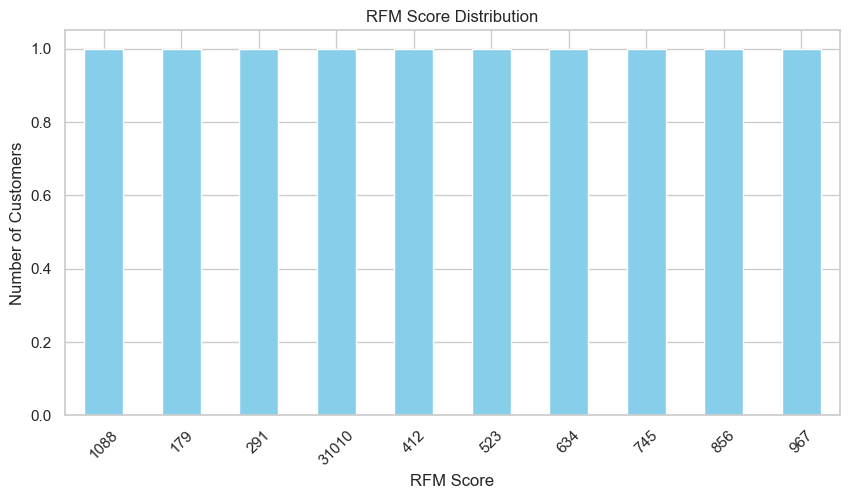

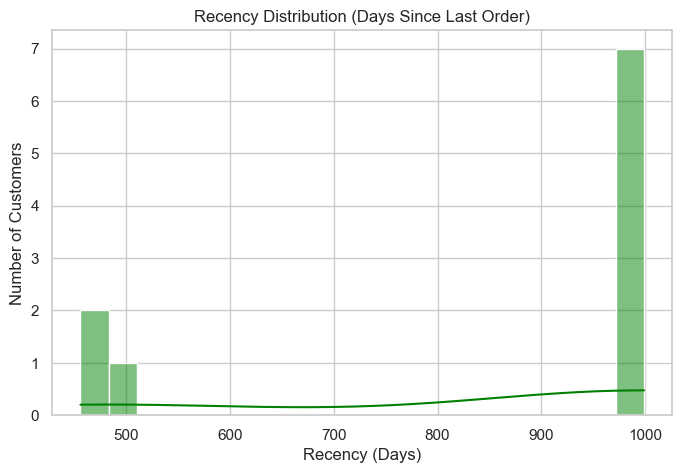

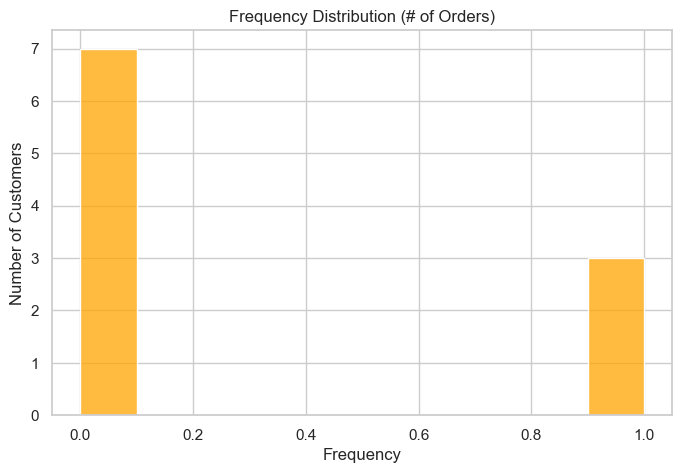

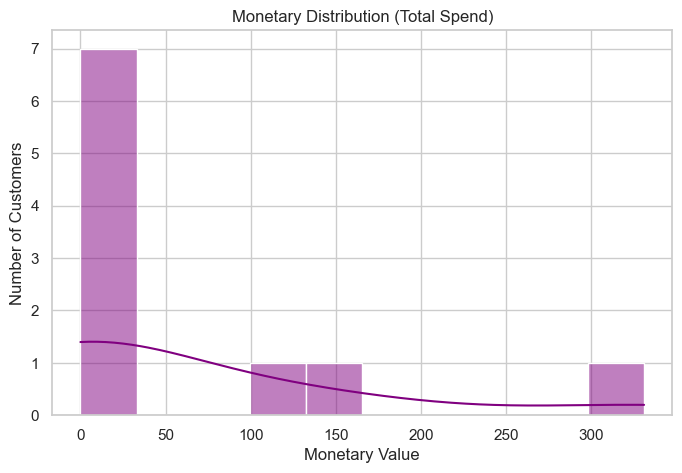

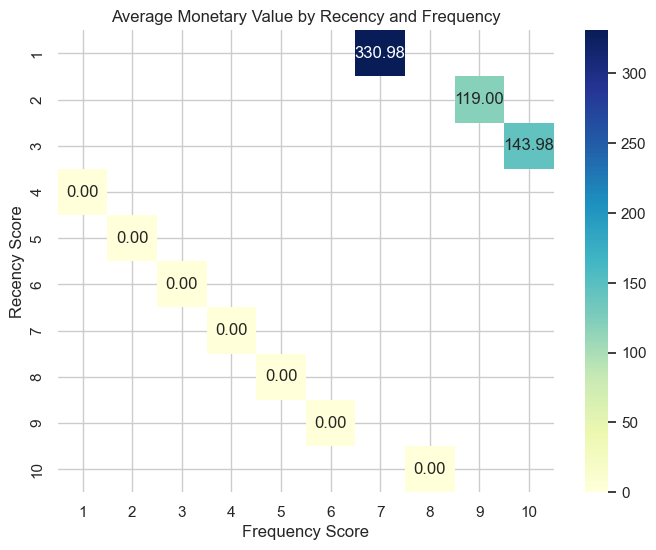

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1️⃣ RFM Score Distribution
plt.figure(figsize=(10,5))
df_rfm['RFM_score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("RFM Score Distribution")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Recency Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_rfm['recency'], bins=20, kde=True, color='green')
plt.title("Recency Distribution (Days Since Last Order)")
plt.xlabel("Recency (Days)")
plt.ylabel("Number of Customers")
plt.show()

# 3️⃣ Frequency Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_rfm['frequency'], bins=10, kde=False, color='orange')
plt.title("Frequency Distribution (# of Orders)")
plt.xlabel("Frequency")
plt.ylabel("Number of Customers")
plt.show()

# 4️⃣ Monetary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_rfm['monetary'], bins=10, kde=True, color='purple')
plt.title("Monetary Distribution (Total Spend)")
plt.xlabel("Monetary Value")
plt.ylabel("Number of Customers")
plt.show()

# 5️⃣ R vs F heatmap (segmentation view)
rf_table = df_rfm.pivot_table(index='R_score', columns='F_score', values='monetary', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(rf_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Monetary Value by Recency and Frequency")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()

In [64]:
def rfm_segment(row):
    if row['RFM_score'] >= '455':
        return 'Champions'
    elif row['RFM_score'] >= '345':
        return 'Loyal'
    elif row['RFM_score'] >= '234':
        return 'Potential'
    else:
        return 'At Risk'

df_rfm['segment'] = df_rfm.apply(rfm_segment, axis=1)
df_rfm.groupby('segment').size()

segment
At Risk      2
Champions    5
Loyal        1
Potential    2
dtype: int64

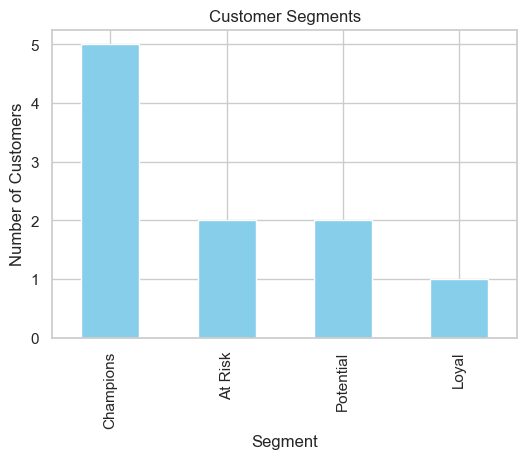

In [65]:
plt.figure(figsize=(6,4))
df_rfm['segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Customer Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\77075\AppData\Local\Temp\ipykernel_1284\3162975791.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='total_revenue', data=df_region, palette='Blues_d')


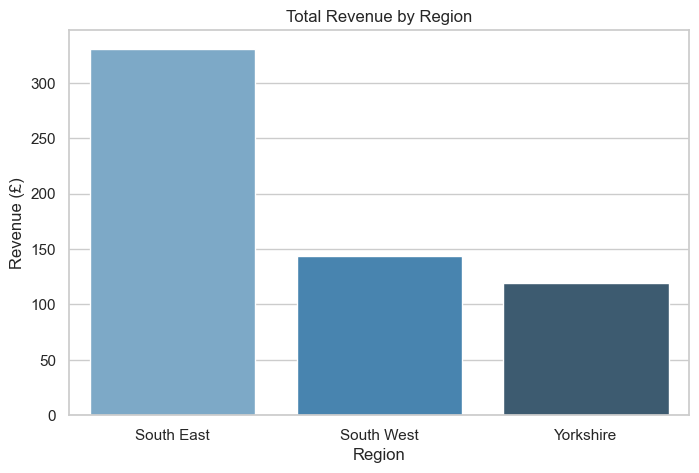

region  total_orders  total_revenue  avg_order_value
0  South East             1        330.980           82.745
1  South West             1        143.982           71.991
2   Yorkshire             1        119.000           59.500

In [66]:
# Profitability by region
query_region = """
SELECT 
    s.region,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS total_revenue,
    AVG((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS avg_order_value
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.region
ORDER BY total_revenue DESC;
"""

with engine.connect() as conn:
    df_region = pd.read_sql(text(query_region), conn)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='total_revenue', data=df_region, palette='Blues_d')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue (£)")
plt.xlabel("Region")
plt.show()

df_region

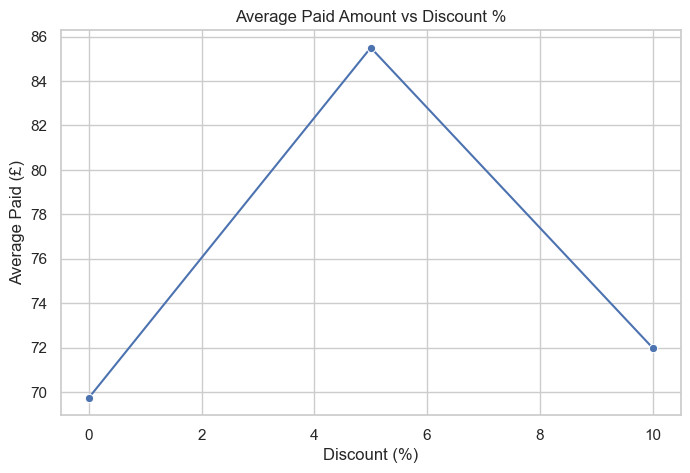

discount_pct  num_orders  avg_order_value  avg_paid
0           0.0           2           69.745    69.745
1           5.0           1           90.000    85.500
2          10.0           1           79.990    71.991

In [67]:
query_discount = """
SELECT 
    oi.discount_pct,
    COUNT(DISTINCT o.order_id) AS num_orders,
    AVG(p.price * oi.quantity) AS avg_order_value,
    AVG((p.price * oi.quantity) * (1 - oi.discount_pct / 100)) AS avg_paid
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY oi.discount_pct
ORDER BY oi.discount_pct;
"""

with engine.connect() as conn:
    df_discount = pd.read_sql(text(query_discount), conn)

# Visualization
plt.figure(figsize=(8,5))
sns.lineplot(x='discount_pct', y='avg_paid', data=df_discount, marker='o')
plt.title("Average Paid Amount vs Discount %")
plt.xlabel("Discount (%)")
plt.ylabel("Average Paid (£)")
plt.show()

df_discount

C:\Users\77075\AppData\Local\Temp\ipykernel_1284\3515497109.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLV', y='customer_name', data=top_clv, palette='viridis')


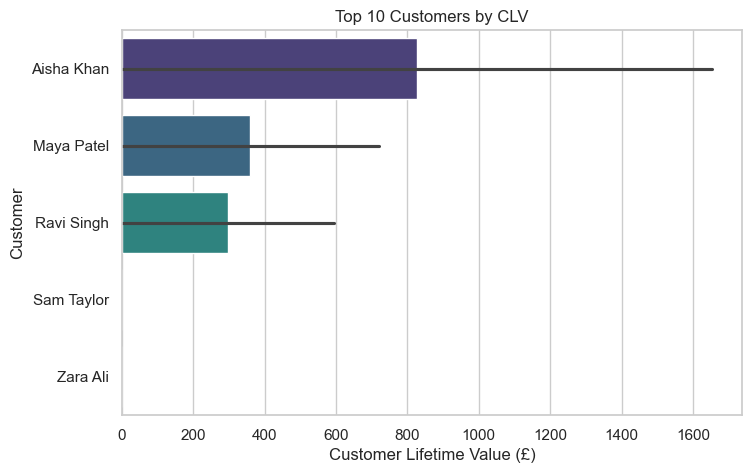

customer_id customer_name last_order_date  frequency  monetary  recency  \
0            1    Aisha Khan      2024-08-01          1   330.980    456.0   
2            3    Maya Patel      2024-06-22          1   143.982    496.0   
1            2    Ravi Singh      2024-07-15          1   119.000    473.0   
3            4    Sam Taylor            None          0     0.000    999.0   
4            5      Zara Ali            None          0     0.000    999.0   
5            6    Aisha Khan            None          0     0.000    999.0   
6            7    Ravi Singh            None          0     0.000    999.0   
7            8    Maya Patel            None          0     0.000    999.0   
8            9    Sam Taylor            None          0     0.000    999.0   
9           10      Zara Ali            None          0     0.000    999.0   

   R_score  F_score  M_score RFM_score    segment  avg_order_value      CLV  
0        1        7        9       179    At Risk          330.980  1654.90  
2        3       10       10     31010  Potential          143.982   719.91  
1        2        9        1       291  Potential          119.000   595.00  
3        4        1        2       412      Loyal            0.000     0.00  
4        5        2        3       523  Champions            0.000     0.00  
5        6        3        4       634  Champions            0.000     0.00  
6        7        4        5       745  Champions            0.000     0.00  
7        8        5        6       856  Champions            0.000     0.00  
8        9        6        7       967  Champions            0.000     0.00  
9       10        8        8      1088    At Risk            0.000     0.00

In [68]:
# Average revenue per customer per order
df_rfm['avg_order_value'] = df_rfm['monetary'] / df_rfm['frequency'].replace(0, 1)

# Estimated CLV = avg_order_value * frequency * expected repeat purchases 
expected_repeat = 5  
df_rfm['CLV'] = df_rfm['avg_order_value'] * df_rfm['frequency'] * expected_repeat

# Visualization: Top 10 CLV customers
top_clv = df_rfm.sort_values('CLV', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x='CLV', y='customer_name', data=top_clv, palette='viridis')
plt.title("Top 10 Customers by CLV")
plt.xlabel("Customer Lifetime Value (£)")
plt.ylabel("Customer")
plt.show()

top_clv

In [69]:

master_df = df_rfm.copy()   ##final df with all analytics
columns_order = [
    'customer_id', 'customer_name', 'region', 
    'recency', 'frequency', 'monetary', 
    'R_score', 'F_score', 'M_score', 
    'RFM_segment', 'RFM_score', 'CLV'
]


columns_order_existing = [col for col in columns_order if col in df_rfm.columns]

# Create master df
master_df = df_rfm[columns_order_existing]

# Export single master CSV
master_df.to_csv("master_customer_analytics.csv", index=False)
print("✅ Master CSV created successfully!")



✅ Master CSV created successfully!
